<font face="XB Zar" size=5><div dir=rtl align=center>
<font face="IranNastaliq" size=5>
به نام خدا
</font>
<br>
<font size=3>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue size=5>
مقدمه‌ای بر یادگیری ماشین
</font>
<br>
<hr/>
<font color=red size=6>
فصل ششم: معماری های کانولوشنی مدرن</font>
<br>
نویسندگان:‌ کوروش مسلمی
<hr>
</div></font>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>1.LeNet</font>
<br>
این معماری توسط
Yann LeCun
در 1998 ارائه شد. این شبکه 5-لایه از 3 لایه کانولوشنی و 2 لایه fully connected تشکیل شده است.(در محاسبه عمق شبکه لایه های pooling(subsampling) را محاسبه نمی کنیم چون وزنی برای train شدن ندارند.)

معماری این شبکه را در شکل زیر میبینیم:
</div></font>

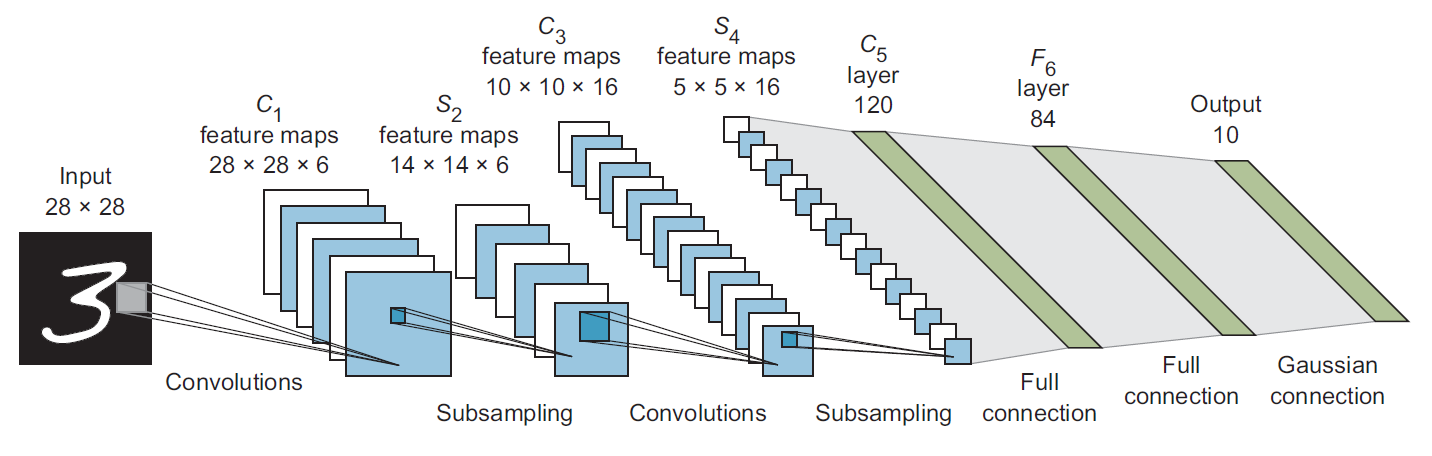

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

input_shape = (img_rows, img_cols, 1)

#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', input_shape=input_shape, padding='same'))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='sigmoid', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='sigmoid'))

# Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)               0

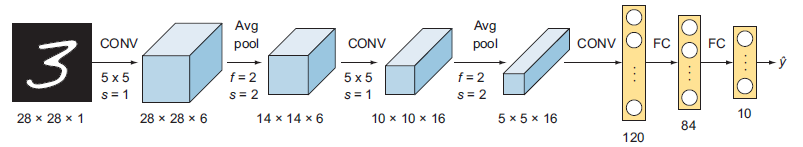

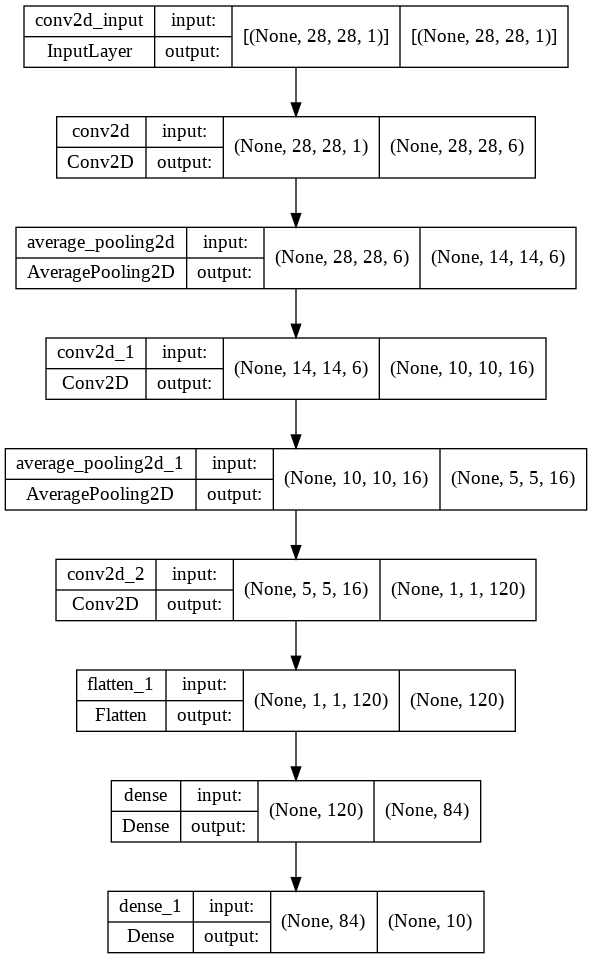

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="letnet.png", show_shapes=True)

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>2.AlexNet</font>
<br>
این شبکه 8-لایه از 5 لایه کانولوشنی و 3 لایه fully connected تشکیل شده است و اولین معماری کانولوشنی مدرن محسوب می شود که در مسابقه دسته بندی تصاویر ImageNet در سال 2012 برنده شده است.

همانطور که در ادامه میبینید شباهت زیادی بین AlexNet و LeNet از لحاظ ساختاری وجود دارد. به طور خاص تکرار لایه های conv-pool و آمدن لایه های fully connected در آخر شبکه مشهود می باشد اما آموزش شبکه ای مثل AlexNet با توجه به امکانات سخت افزاری و داده در دسترس در 1998 بسیار سخت بود به همین دلیل تا سال 2012 ارائه این معماری طول کشیده است.

</div></font>

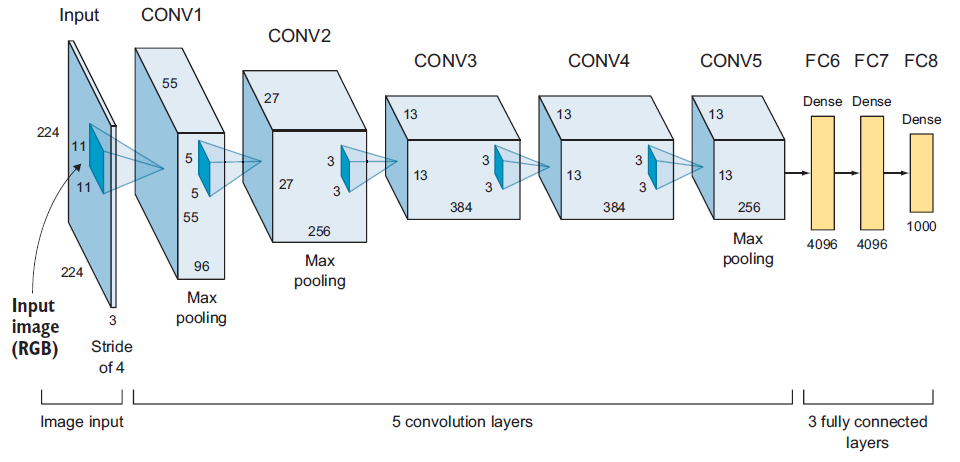

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,Activation,MaxPool2D, BatchNormalization, Dropout
from keras.regularizers import l2

# Instantiate an empty sequential model
model = Sequential(name="Alexnet")

# 1st layer (conv + pool + batchnorm)
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', kernel_regularizer=l2(0.0005),
input_shape = (227,227,3)))
model.add(Activation('relu'))  #<---- activation function can be added on its own layer or within the Conv2D function
model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
model.add(BatchNormalization())
    
# 2nd layer (conv + pool + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
            
# layer 3 (conv + batchnorm)      <--- note that the authors did not add a POOL layer here
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
        
# layer 4 (conv + batchnorm)      <--- similar to layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
            
# layer 5 (conv + batchnorm)  
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# layer 6 (Dense layer + dropout)  
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

# layer 7 (Dense layers) 
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
                           
# layer 8 (softmax output layer) 
model.add(Dense(units = 1000, activation = 'softmax'))

# print the model summary
model.summary()

Model: "Alexnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0   

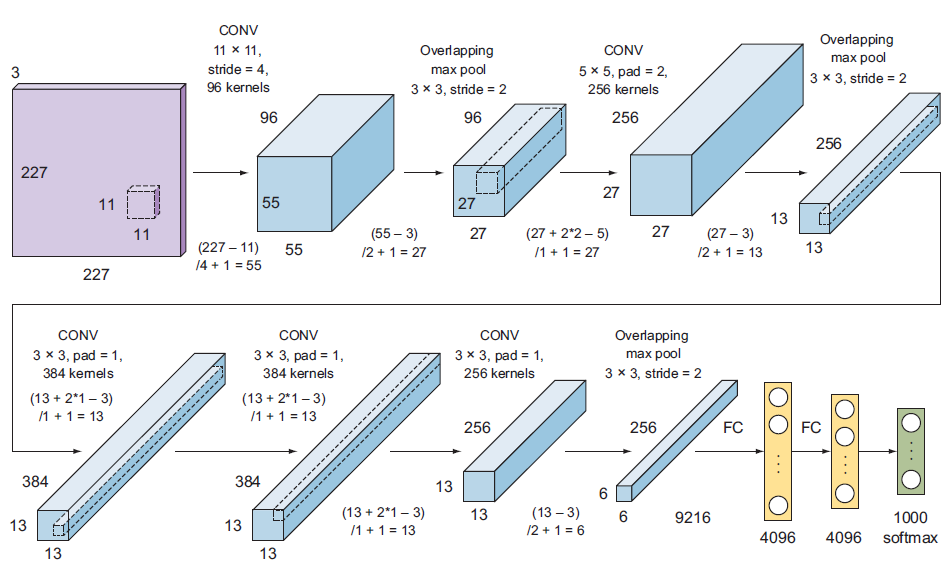

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>برخی تفاوت های AlexNet با LeNet</font>
<br>

1. از لحاظ تعداد پارامتر LeNet حدود 61000 پارامتر و AlexNet حدود 62 میلیون پارامتر دارد.

2. در LeNet از AveragePooling و در AlexNet از MaxPooling استفاده شده است.

3. در LeNet از تابع فعال سازی sigmoid و در AlexNet از ReLu استفاده شده است. دلیل این موضوع train سریع تر و ساده تر با ReLU می باشد. به عبارت دیگر، در تابع sigmoid وقتی خروجی تابع به صفر و یک نزدیک است مشتق تقریبا صفر است. در مقابل در ReLU که
$f(x)=max(0,x)$
است مشتق در بازه مثبت همواره یک است که ازمشکل کوچک شدن بیش از حد گرادیان ها یا vanishing gradient problem جلوگیری می کند. 


</div></font>

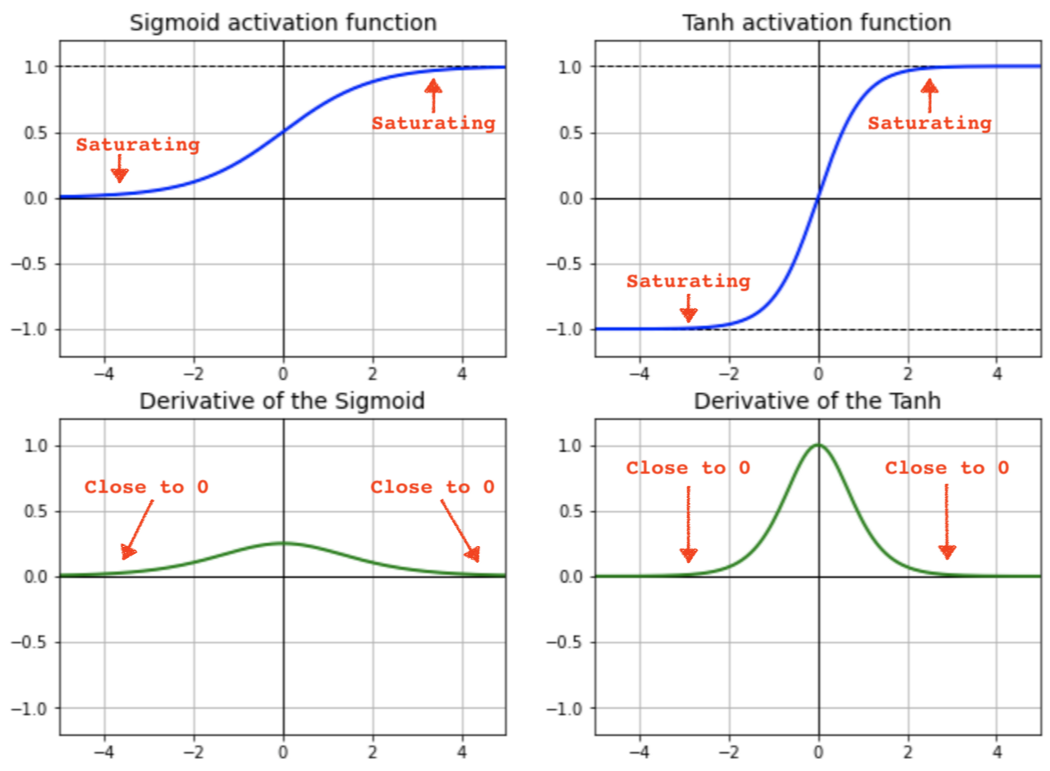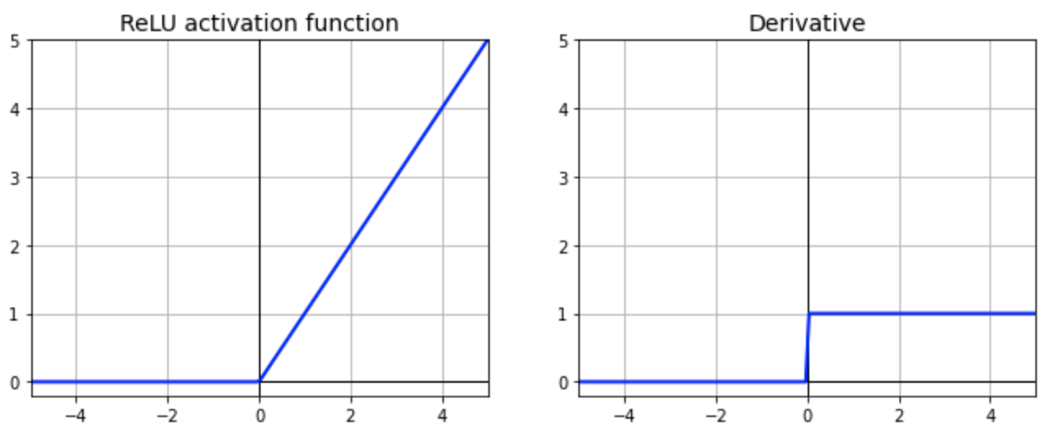

<font face="XB Zar" size=4><div dir=rtl>

4. در AlexNet از تکنیک dropout برای مقابله با بیش برازش (overfitting)
استفاده شده است. چرا که نورون هایی که غیر فعال می شوند باعث می شوند سایر نورون ها ویژگی های robust تری یادگرفته و از وابستگی های پیچیده بین آن ها جلوگیری می کند. همچنین از L2 regularization یا Weight decay نیز برای مقابله با بیش برازش استفاده می شود.

5. معماری AlexNet از نرمال سازی برای تسریع همگرایی استفاده می کند.

<div>
<center>
<img src="https://d2l.ai/_images/alexnet.svg
" width="500">
</center>
</div>

</div></font>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>3.VGGNet</font>
<br>
با وجود اینکه
AlexNet
شواهد تجربی خوبی از اینکه شبکه های کانولوشنی عمیق به نتایج خوبی می رسند، فراهم کرد خلا یک روش سازمان یافته برای توسعه و طراحی شبکه های عمیق تر احساس می شد.
در اینجا برخلاف معماری قبلی یک بلوک کانولوشنی واحد معرفی می شود و شبکه با تکرارمتوالی آن ساخته می شود. که این بلوک از لایه های کانولوشنی با سایز کرنل
$3 \times 3$
با stride یک به دنبال لایه pooling،
$2 \times 2$
با stride دو ساخته شده است.

<div>
<center>
<img src="https://d2l.ai/_images/vgg.svg
" width="500">
</center>
</div>
پیش از این در طراحی شبکه های کانولوشنی تکنیک های زیر به کار گرفته شده است:

1. استفاده از لایه های کانولوشنی با padding برای حفظ رزولوشن

2. استفاده از توابع غیرخطی مانند ReLU برای افزایش ظرفیت یادگیری شبکه

3. استفاده از لایه pooling مانند max-pooling برای کاهش رزولوشن

چالشی که مشهود است کاهش سریع spatial resolution می باشد که نتیجه آن محدودیت
$log_2 d$
برای تعداد لایه های شبکه می باشد که d بعد عکس ورودی به شبکه می باشد. مثلا در ImageNet که عکس ها
$224 \times 224$
هستند، بدون استفاده از ایده ای جدید از 8 لایه نمی توان فراتر رفت.

ایده ای جدید این است که با چسباندن سه لایه کانولوشنی
$3 \times 3$ 
با stride یک همان receptive field یک لایه کانولوشنی
$7 \times 7$
را داریم(چرا؟) ضمن اینکه سه لایه غیرخطی ظرفیت شبکه را بیشتر می کند. همچنین از لحاظ تعداد پارامتر وقتی C تعداد کانال باشد در حالت تک لایه
$49 C^2$
پارامتر و در حالت سه لایه
$27 C^2$
پارامتر داریم که یعنی حالت تک لایه
$81 \%$
پارامتر بیشتر دارد!


</div></font>

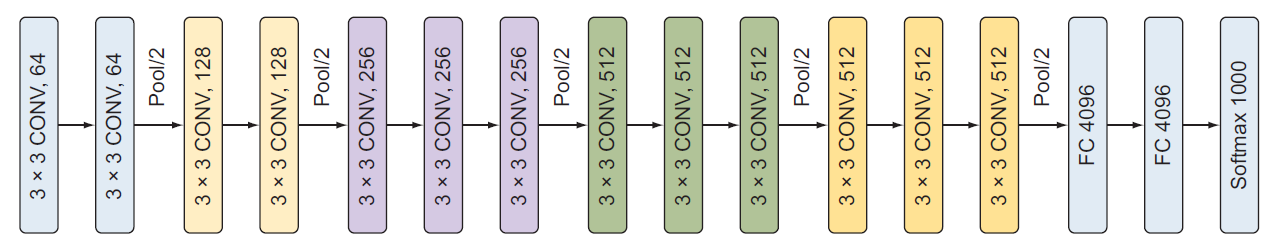

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D

model = Sequential()

# first block
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# second block
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# third block
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# forth block
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# fifth block
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# sixth block (classifier)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_24 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>4.Network in Network(NiN)</font>
<br>

قبل از معرفی این شبکه به معرفی کانولوشن 
$1 \times 1$
می پردازیم. فرض کنید می خواهیم ورودی
$32 \times 32 \times 200$
را با 32 فیلتر کانولوشن
$5 \times 5$
به خروجی
$32 \times 32 \times 32$
تبدیل کنید در این صورت به
$(32 \times 32 \times 200) \times (5 \times 5 \times 32) ≈ 163M$
عملیات نیاز داریم. با کمک کانولوشن 
$1 \times 1$
می توانیم تعداد عملیات ها را مطابق شکل زیر
$\frac{1}{10}$
کنیم:


</div></font>

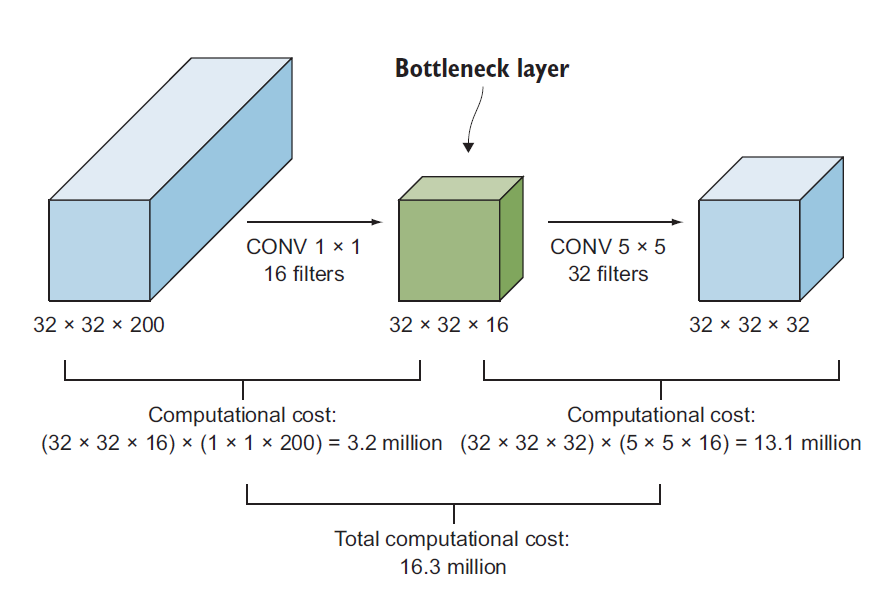

<font face="XB Zar" size=4><div dir=rtl>

به چگونگی انجام این عملیات در شکل زیر دقت کنید:

<div>
<center>
<img src="https://miro.medium.com/max/875/1*dNaikOfrGzUaJ2EzRIl4tw.png
" width="500">
</center>
</div>

اکنون آماده ایم NiN را معرفی کنیم. همانطور که در شکل زیر می بینید در هر بلوک NiN از کانولوشن
$1 \times 1$
استفاده می شود و در انتهای شبکه به لایه های 
fully connected
نیازی ندارد.

<div>
<center>
<img src="https://d2l.ai/_images/nin.svg
" width="500">
</center>
</div>

</div></font>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAvgPool2D, Flatten, Dense, Activation, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D


def nin_block(out_channels, kernel_size, strides, padding):
    return Sequential([
    Conv2D(out_channels, kernel_size, strides=strides, padding=padding),
    Activation('relu'),
    Conv2D(out_channels, 1),
    Activation('relu'),
    Conv2D(out_channels, 1),
    Activation('relu')])

model = Sequential()
num_classes=10

model.add(nin_block(96, kernel_size=11, strides=4, padding='valid'))
model.add(MaxPool2D(pool_size=3, strides=2))

model.add(nin_block(256, kernel_size=5, strides=1, padding='same'))
model.add(MaxPool2D(pool_size=3, strides=2))

model.add(nin_block(384, kernel_size=3, strides=1, padding='same'))
model.add(MaxPool2D(pool_size=3, strides=2))
model.add(Dropout(0.5))

model.add(nin_block(num_classes, kernel_size=3, strides=1, padding='same'))
model.add(Flatten())

model.build((None, 224, 224, 3))
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_36 (Sequential)  (None, 54, 54, 96)        53568     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 sequential_37 (Sequential)  (None, 26, 26, 256)       746240    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 sequential_38 (Sequential)  (None, 12, 12, 384)       1180800   
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 384)      

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>5.Inception & GoogLeNet</font>
<br>

ابتدا خوب است تفاوت Inception با شبکه های کانولوشنی کلاسیک که تا اینجا بررسی کردیم را در یک نگاه ببینیم:

</div></font>

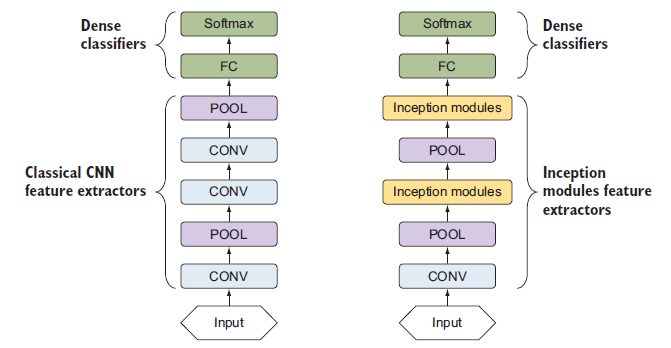

<font face="XB Zar" size=4><div dir=rtl>

همانطور که متوجه شدید ماژول Inception در این معماری جدید می باشد. این ماژول از چهار نوع کانولوشن مطابق شکل زیر استفاده می کند:

</div></font>

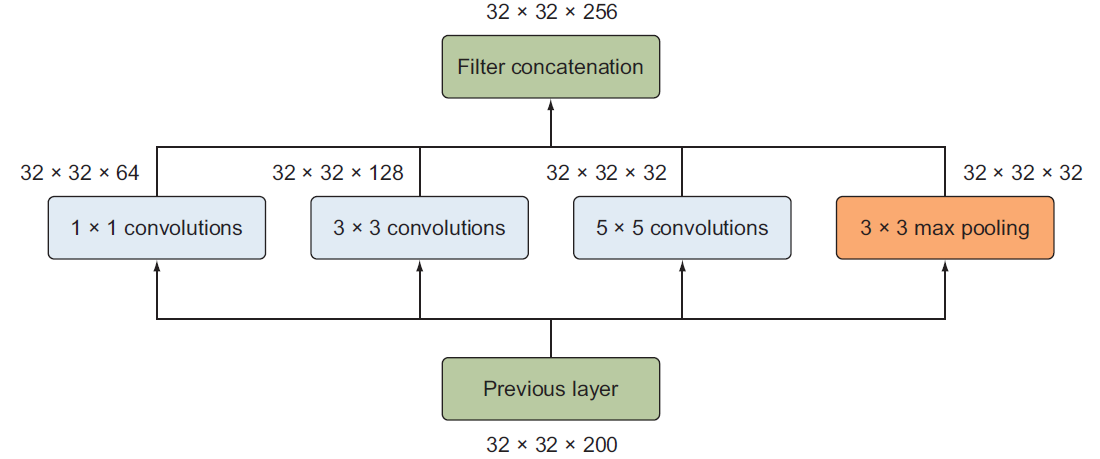

<font face="XB Zar" size=4><div dir=rtl>

اکنون که با خاصیت کاهش ابعاد کانولوشن
$1 \times 1$
آشنا هستیم می توانیم تغییرات زیر را اضافه کنیم:

</div></font>

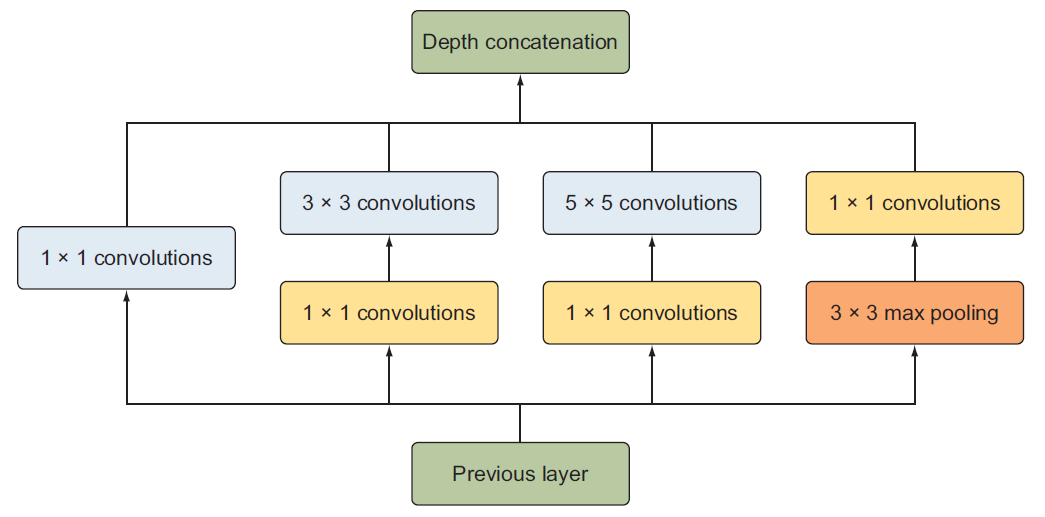

In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

<font face="XB Zar" size=4><div dir=rtl>

می توانیم ماژول های Inception را یکی پس از دیگری قرار دهیم تا شبکه ای مثل GoogLeNet را بسازیم:

</div></font>

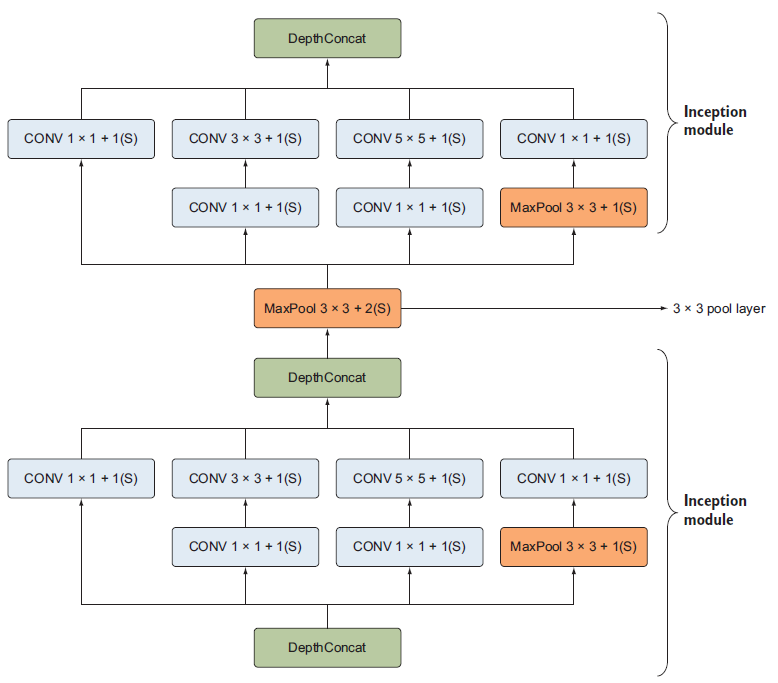

<font face="XB Zar" size=4><div dir=rtl>

معماری دقیق تر GoogLeNet به شکل زیر است:

</div></font>

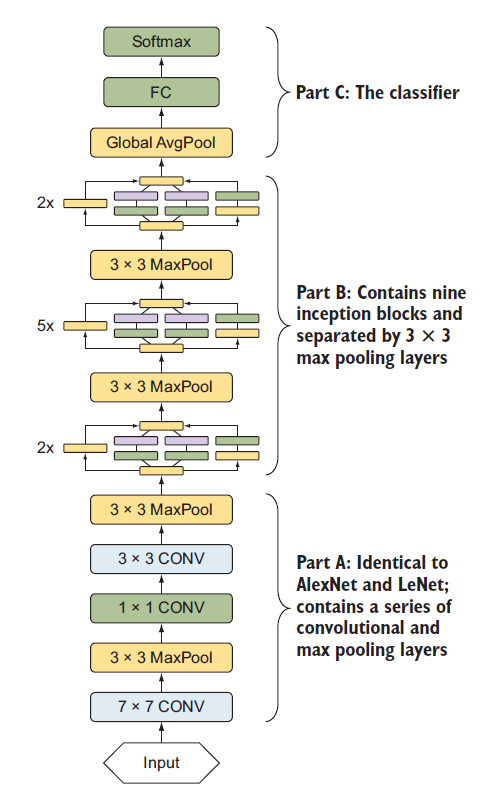

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
# x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


classifier_1 = AveragePooling2D((5, 5), strides=3)(x)
classifier_1 = Conv2D(128, (1, 1), padding='same', activation='relu')(classifier_1)
classifier_1 = Flatten()(classifier_1)
classifier_1 = Dense(1024, activation='relu')(classifier_1)
classifier_1 = Dropout(0.7)(classifier_1)
classifier_1 = Dense(10, activation='softmax', name='auxilliary_output_1')(classifier_1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


classifier_2 = AveragePooling2D((5, 5), strides=3)(x)
classifier_2 = Conv2D(128, (1, 1), padding='same', activation='relu')(classifier_2)
classifier_2 = Flatten()(classifier_2)
classifier_2 = Dense(1024, activation='relu')(classifier_2)
classifier_2 = Dropout(0.7)(classifier_2)
classifier_2 = Dense(10, activation='softmax', name='auxilliary_output_2')(classifier_2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid',name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)
x = Dense(1000, activation='relu', name='linear')(x)
x = Dense(1000, activation='softmax', name='output')(x)

model = Model(input_layer, [x, classifier_1, classifier_2], name='googlenet_complete_architecture')
model.summary()

Model: "googlenet_complete_architecture"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                  

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>6.RestNet & ResNeXt</font>
<br>

ابتدا خوب است تفاوت Resnet با شبکه های کانولوشنی که تا اینجا بررسی کردیم را در یک نگاه ببینیم:

</div></font>

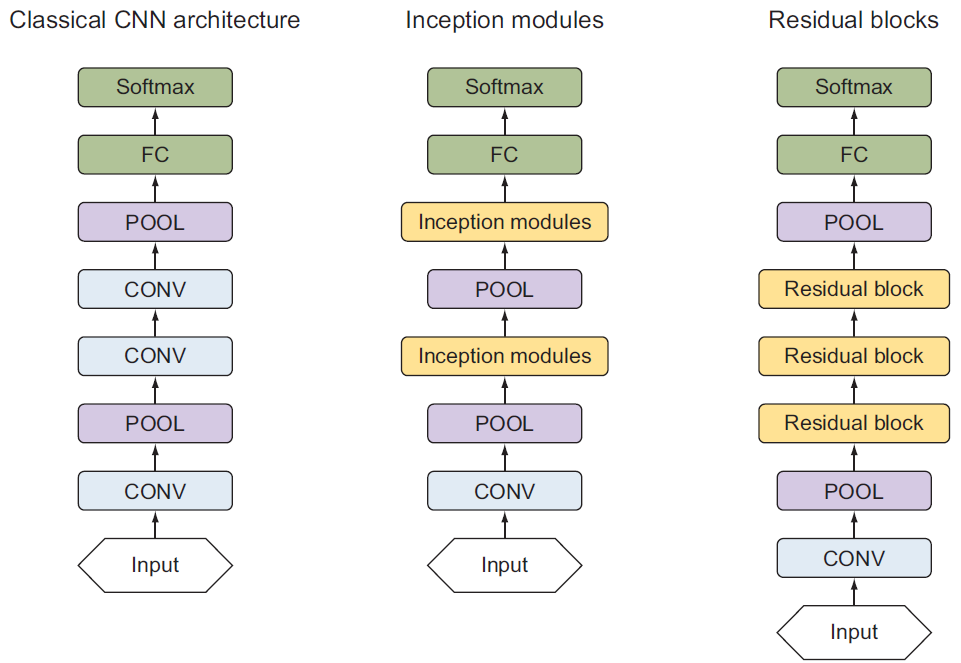

<font face="XB Zar" size=4><div dir=rtl>

همانطور که متوجه شدید بلوک های Residual در این معماری جدید می باشد. قبل معرفی آن ها مفهوم skip connection را بررسی می کنیم. 

skip connection
در واقع میانبری است که به مسیر اصلی شبکه اضافه می شود تا از مشکل
vanishing gradient
در شبکه جلوگیری کند. به شکل زیر دقت کنید:

</div></font>

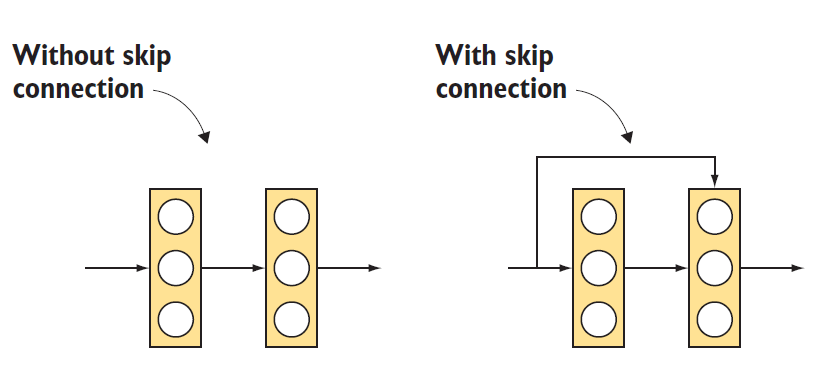

<font face="XB Zar" size=4><div dir=rtl>

ممکن است بپرسید چرا فلش skip connection را به بعد لایه دوم نکشیدیم. در واقع منظور این است خروجی مسیر اصلی با میانبر جمع می شود و سپس تابع فعال ساز اعمال می شود. به طور دقیق تر داریم:

</div></font>

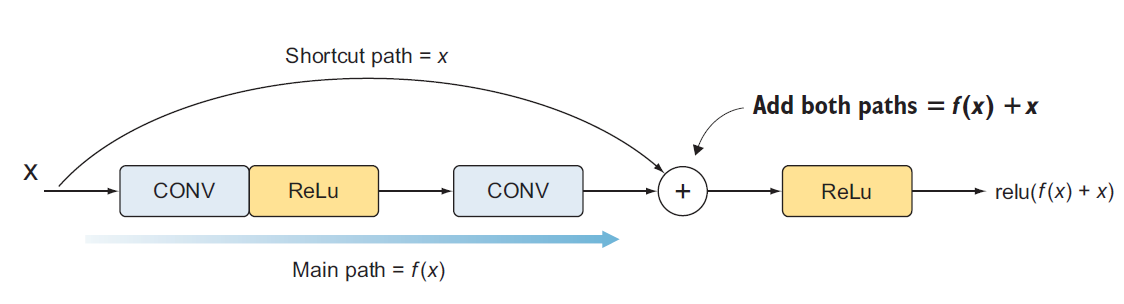

<font face="XB Zar" size=4><div dir=rtl>

اکنون آماده ایم بلوک Residual را معرفی کنیم. دقت کنید دو حالت در ادامه معرفی شده است که فرق آن ها در پیاده سازی میانبر آن ها است. میانبر اولی Regular است یعنی ورودی بدون تغییر با خروجی مسیر اصلی جمع می شود. میانبر دوم  Reduce shortcut است و در میانبر آن از کانولوشن
$1 \times 1$
استفاده شده است.

</div></font>

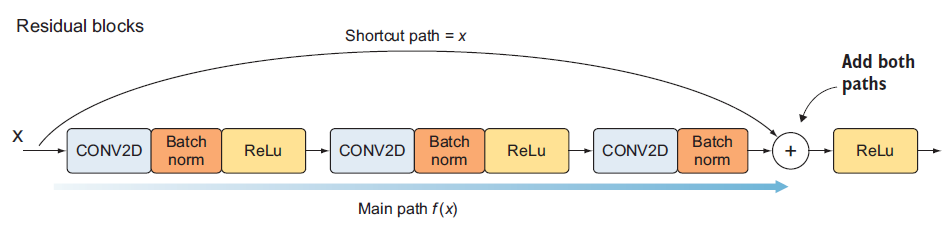

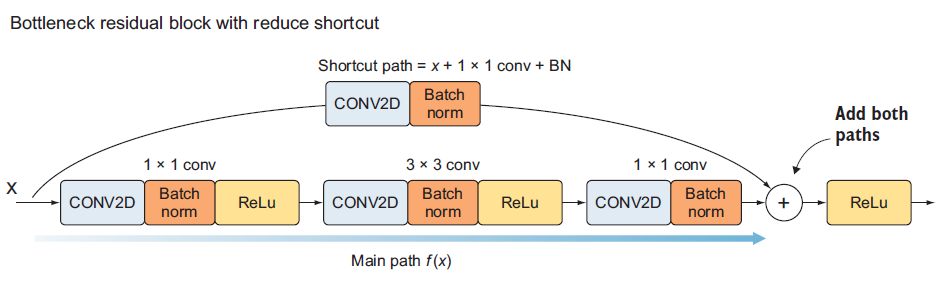

<font face="XB Zar" size=4><div dir=rtl>

در واقع استفاده از skip connection باعث میشود معماری شبکه بعد از اضافه کردن یک بلوک residual حداقل به اندازه قبل از اضافه کردن آن خوب باشد. به عبارت دیگر skip connection تضمین می کند کلاس توابعی که معماری شبکه بعد از train شدن می تواند به آن برسد به صورت nested باشد و تابع مطلوب ما را در برگیرد.

<div>
<center>
<img src="https://d2l.ai/_images/functionclasses.svg
" width="500">
</center>
</div>

در ادامه پیاده سازی این شبکه را میبینیم:

</div></font>

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform

def bottleneck_residual_block(X, f, filters, stage, block, reduce=False, s=2):
    """    
    Arguments:
    X -- input tensor of shape (m, height, width, channels)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    reduce -- boolean, True = identifies the reduction layer at the beginning of each learning stage
    s -- integer, strides
    
    Returns:
    X -- output of the identity block, tensor of shape (H, W, C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    if reduce:
        # if we are to reduce the spatial size, apply a 1x1 CONV layer to the shortcut path
        # to do that, we need both CONV layers to have similar strides 
        X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
        X = Activation('relu')(X)
        
        X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
        X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)
    else: 
        # First component of main path
        X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
        X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def ResNet50(input_shape, classes):
    """
    Arguments:
    input_shape -- tuple shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X_input)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = bottleneck_residual_block(X, 3, [64, 64, 256], stage=2, block='a', reduce=True, s=1)
    X = bottleneck_residual_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = bottleneck_residual_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 
    X = bottleneck_residual_block(X, 3, [128, 128, 512], stage=3, block='a', reduce=True, s=2)
    X = bottleneck_residual_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = bottleneck_residual_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = bottleneck_residual_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = bottleneck_residual_block(X, 3, [256, 256, 1024], stage=4, block='a', reduce=True, s=2)
    X = bottleneck_residual_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = bottleneck_residual_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = bottleneck_residual_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = bottleneck_residual_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = bottleneck_residual_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = bottleneck_residual_block(X, 3, [512, 512, 2048], stage=5, block='a', reduce=True, s=2)
    X = bottleneck_residual_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = bottleneck_residual_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = AveragePooling2D((1,1), name="avg_pool")(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Create the model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


model = ResNet50(input_shape = (32,32, 3), classes = 10)
model.summary()


Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 13, 13, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 13, 13, 64)   256         ['conv1[0][0]']                  
                                                                                                  
 activation (Activation)        (None, 13, 13, 64)   0           ['bn_conv1[0][0]']               
                                                                                           

<font face="XB Zar" size=4><div dir=rtl>

با الهام از ماژول Inception و ایده Skip Connection بلوک ResNeXt
را معرفی می کنیم:


<div>
<center>
<img src="	https://d2l.ai/_images/resnext-block.svg
" width="700">
</center>
</div>

دلیل استفاده از g تا شاخه کانولوشنی مزیت محاسباتی آن است. درواقع یک کانولوشن با تعداد کانال ورودی 
$c_i$
و کانال خروجی
$c_o$
به g تا کانولوشن با تعداد کانال ورودی 
$c_i/g$
و خروجی
$c_o/g$
شکسته می شود که هزینه محاسباتی را از
$\mathcal{O}(c_i \cdot c_o)$
به
$\mathcal{O}(g \cdot (c_i/g) \cdot (c_o/g)) = \mathcal{O}(c_i \cdot c_o / g)$
کاهش می دهد. یک چالش در این طراحی عدم تبادل اطلاعات بین g شاخه است. به همین جهت یک کانولوشن
$1 \times 1$
در انتها برای تغییر تعداد کانال ها گذاشته شده است.

</div></font>

In [ ]:
import tensorflow as tf

class ResNeXtBlock(tf.keras.Model):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = tf.keras.layers.Conv2D(bot_channels, 1, strides=1)
        self.conv2 = tf.keras.layers.Conv2D(bot_channels, 3, strides=strides,
                                            padding="same",
                                            groups=bot_channels//groups)
        self.conv3 = tf.keras.layers.Conv2D(num_channels, 1, strides=1)
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.bn3 = tf.keras.layers.BatchNormalization()
        if use_1x1conv:
            self.conv4 = tf.keras.layers.Conv2D(num_channels, 1,
                                                strides=strides)
            self.bn4 = tf.keras.layers.BatchNormalization()
        else:
            self.conv4 = None

    def call(self, X):
        Y = tf.keras.activations.relu(self.bn1(self.conv1(X)))
        Y = tf.keras.activations.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return tf.keras.activations.relu(Y + X)

blk = ResNeXtBlock(32, 16, 1)
X = tf.random.normal((4, 96, 96, 32))
Y = blk(X)
Y.shape

TensorShape([4, 96, 96, 32])

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>منابع:</font>
<br>

1. کتاب
Deep Learning for Vision Systems 
از
Mohamed Elgendy

2. فصل های 7 و 8 کتاب 
[Dive into Deep Learning](https://d2l.ai/index.html)

</div></font>